# Entendendo o gradiente descendente ⛰️

O algoritmo do gradiente descendente é um algoritmo de otimização muito utilizado no aprendizado de máquina que é capaz de **otimizar um processo de convergência para encontrar o menor erro possível de um aprendizado de um algoritmo**. O grande objetivo desse algoritmo é ajustar iterativamente os parâmetros do algoritmo para **minimizar uma função de custo**.

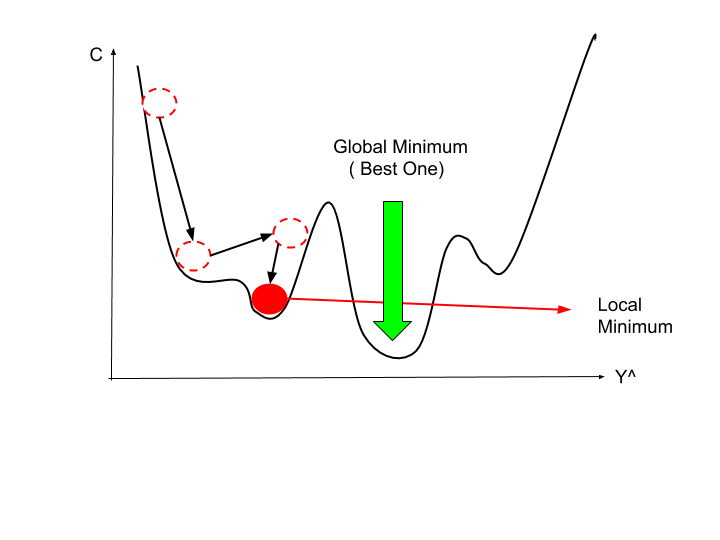

Para entendermos a aplicação do gradiente em python, vamos nessa aula trabalhar com uma base de dados que contém características de imóveis e vamos tentar prever o preço médio do imóvel com o algoritmo de gradiente.

In [ ]:
import pandas as pd
dados = pd.read_csv('housing.csv', sep= ',')
dados.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
set(dados['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [ ]:
dados.shape

(20640, 10)

# Feature Engineering
Antes de iniciar a construção do gradiente, vamos tratar os dados categóricos antes de colocar os dados nas bases de treino e teste.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instanciando a classe do OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(dados[['ocean_proximity']]).toarray()
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenar os novos dados codificados ao dados
df_encoded = pd.concat([dados, df_encoded], axis=1)
df_encoded = df_encoded.drop(['ocean_proximity'], axis=1)
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


# Data Clean

Vamos organizar os dados nulos.

In [ ]:
df_encoded.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_encoded_limpo = imputer.fit_transform(df_encoded)

In [ ]:
df_encoded_limpo = pd.DataFrame(df_encoded_limpo, columns=df_encoded.columns)
df_encoded_limpo.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_encoded_limpo.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

# Separando os dados em treino e teste

In [ ]:
df_encoded_limpo.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
# Separando os dados em x e y
X = df_encoded_limpo.drop(['median_house_value'], axis=1)

y = df_encoded_limpo['median_house_value'].values

In [ ]:
X.shape

(20640, 13)

In [ ]:
y.shape

(20640,)

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


# Padronizando/Normalizando as características

A transformação das features em escalas padronizadas é **essencial para a função de custo convergir no mínimo local de forma mais rápida e eficiente**. Como você pode observar na figura abaixo, o algoritmo do gradiente descendente vai diretamente para o mínimo local, atingindo rapidamente, enquanto à direita, o gradiente primeiro avança em sentido quase ortogonal em direção ao mínimo local e termina com uma longa marcha em um vale quase plano.

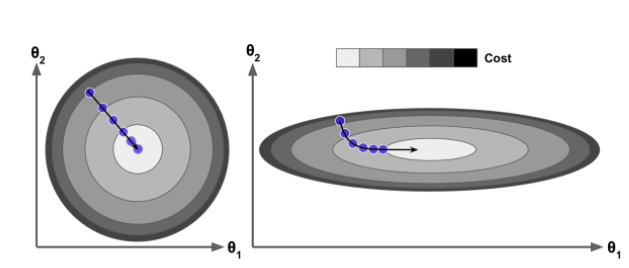

Primeiramente, vamos separar os dados em treino e teste e após a separação, vamos aplicar a padronização dos dados na base de treino e aplicar a transformação na base de teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler # z-score

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler apenas na base de treino
scaler.fit(X_train)

# Aplicar a transformação nas bases de treino e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.01556621,
        -0.35564565,  2.62975816],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.18553953,  0.90651045, -1.07984112, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ]])

# Aplicando o algoritmo de gradiente! ⛰️

Nessa aula vamos testar a aplicação do **Gradiente descendente estocástico (SGD)**. Você pode encontrar a aplicação desse modelo no sklearn pelo link https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html


O gradiente descendente estocástico escolhe uma **instância aleatória no conjunto de treinamento** em **cada etapa e calcula os gradientes baseados apenas nessa única instância**.

Isso torna esse tipo de gradiente **bem mais rápido**, pois poucos dados são manipulados em cada iteração. Uma ótima opção para grandes conjuntos de dados, uma vez que apenas uma instância precisa estar na memória a cada iteração. Porém, devido a sua aleatoriedade (dai que vem a palavrinha estocástica), esse algoritmo é bem menos regular que o gradiente descendente em lote. **Em vez de diminuir suavemente até atingir o mínimo, a função de custo vai subir e descer, diminuindo apenas a média. Ao longo do tempo acabará bem perto do mínimo, mas ao chegar lá,  gradiente continua a rebater, nunca se estabilizando, gerando assim valores finais bons mas não ótimos**.

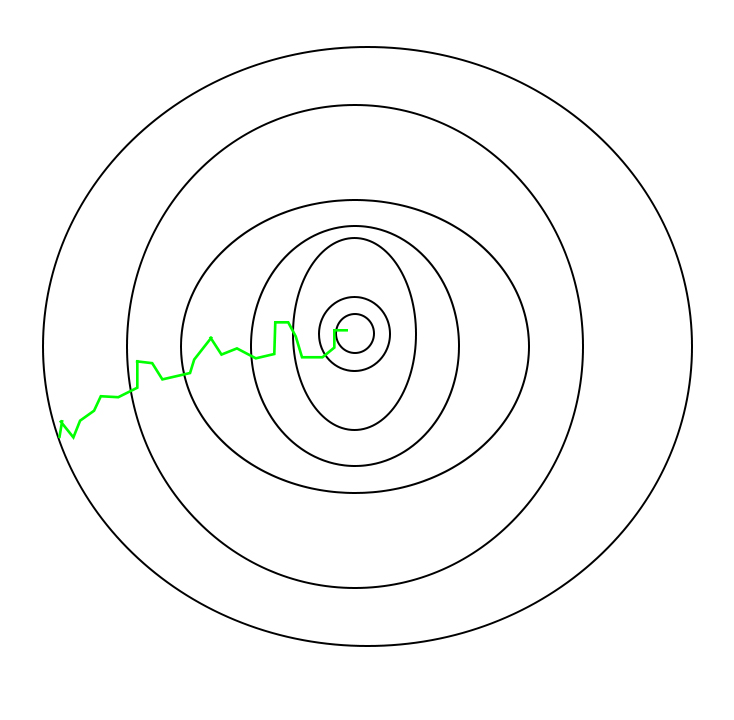

Quando a função de custo é muito irregular, pode ajudar o algoritmo a pular fora do mínimo local, de modo que o gradiente estocástico terá uma chance maior de encontrar o mínimo global do que o gradiente em lote. Desta forma, a aleatoriedade é boa para escapar de um ótimo local, mas ruim porque significa que o algoritmo nunca pode se estabelecer no mínimo. Uma boa solução para escapar dessa situação é diminuir gradualmente a taxa de aprendizagem. As etapas começam grandes, auxiliando a escapar dos mínimos locais, e depois diminuir as etapas permitindo que o algoritmo se estabeleça no mínimo global.


In [ ]:
from sklearn.linear_model import SGDRegressor
# A estratégia learning_rate='optimal' é geralmente uma boa escolha para problemas de regressão linear
# Especialmente quando a regularização L2 é utilizada.

# Treinar o modelo com SGDRegressor
sgd_reg = SGDRegressor(loss='squared_error',
                       learning_rate='optimal',
                       alpha=0.001,  # Quanto maior o valor, mais forte será a regularização.
                       penalty='l2', # adiciona uma penalidade à função de custo que é proporcional à soma dos quadrados dos
                                     # valores dos parâmetros do modelo (evita o overfitting)
                       max_iter=1000)
sgd_reg.fit(X_train_scaled, y_train.ravel())

SGDRegressor(alpha=0.001, learning_rate='optimal')

# Principais parâmetros do scikit-learn para descida do gradiente

- **loss** (*padrão='squared_loss*'): Função de perda a ser minimizada (por exemplo, 'squared_loss' para erro quadrático médio).

- **learning_rate** (*padrão='invscaling*'): Estratégia de taxa de aprendizado (por exemplo, 'invscaling' para taxa decrescente inversamente proporcional ao número de iterações).

- **alpha** (*padrão=0.0001*): Regularização L1 ou L2 (parâmetro de regularização). Quanto maior o valor, mais forte será a regularização. Também usado para calcular a taxa de aprendizagem quando *learning_rate* definido como 'optimal'. Os valores devem estar no intervalo .[0.0, inf).

- **penalty** (*padrão=l2*): Termo de regularização a ser utilizado no modelo.

- **max_iter** (*padrão=1000*): Número máximo de iterações.

## Quais são os tipos de regularização e como escolher? 📉

**Regularização L1 (LASSO)**
Essa técnica adiciona uma penalidade à função de custo que é proporcional à soma dos valores absolutos dos parâmetros do modelo. Essa aplicação de penalidade, auxilia o modelo a encontrar soluções com menos parâmetros (o que reduz a complexidade do modelo).

**Regularização L2 (RIDGE)**
Essa técnica adiciona uma penalidade à função de custo que é proporcional à soma dos quadrados dos valores dos parâmetros do modelo. Esse tipo de penalidade evita que os parâmetros dos modelos assumam valores muito grandes ( o que previne o overfitting).

**Elastic Net (combinação de L1 e L2)**
Esse tipo de técnica realiza a combinação das regularizações L1 e L2, fornecendo assim flexibilidade na seleção de features e na redução da complexidade do modelo.


# Validando o modelo com métricas de regressão 🔍

- **R²**: O R² é uma medida de **quão bem o modelo se ajusta aos dados**. Ele varia de 0 a 1, onde 1 indica um ajuste perfeito.

- **Erro quadrático médio**: O erro quadrático médio é uma medida da diferença entre os valores previstos e os valores reais. Ele é calculado **somando os quadrados das diferenças entre os valores previstos e os valores reais e dividindo pelo número de observações**.

- **Erro absoluto médio**: O erro absoluto médio é uma medida da diferença média entre os valores previstos e os valores reais. Ele é **calculado somando as diferenças absolutas entre os valores previstos e os valores reais e dividindo pelo número de observações**.

- **Erro percentual absoluto médio:** O erro percentual absoluto médio é uma medida da diferença média percentual entre os valores previstos e os valores reais. Ele é calculado somando as diferenças percentuais absolutas entre os valores previstos e os valores reais e dividindo pelo número de observações.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Avaliar o modelo na base de teste
y_pred = sgd_reg.predict(X_test_scaled)


r2 = r2_score(y_test, y_pred) # R²
mse = mean_squared_error(y_test, y_pred) # Erro quadrático médio
mae = mean_absolute_error(y_test, y_pred) # Erro absoluto médio

# Imprimir os resultados
print("R²:", r2)
print("Erro quadrático médio:", mse)
print("Erro absoluto médio:", mae)


R²: 0.6231407001683475
Erro quadrático médio: 4938398100.329767
Erro absoluto médio: 51007.293680765426


In [ ]:
import numpy as np

def mapr(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mapr_sgd = mapr(y_test, y_pred)
print("Erro percentual absoluto médio:", mapr_sgd)


Erro percentual absoluto médio: 29.434639011149315


# Utilizando o gradiente nas redes neurais

Também podemos utilizar os gradientes nas redes neurais! Utilizando o modelo de Regressor Perceptron multicamadas.

Este modelo **otimiza o erro quadrático usando descida gradiente estocástica** como uma de suas possíveis opções de minimização da função de custo.


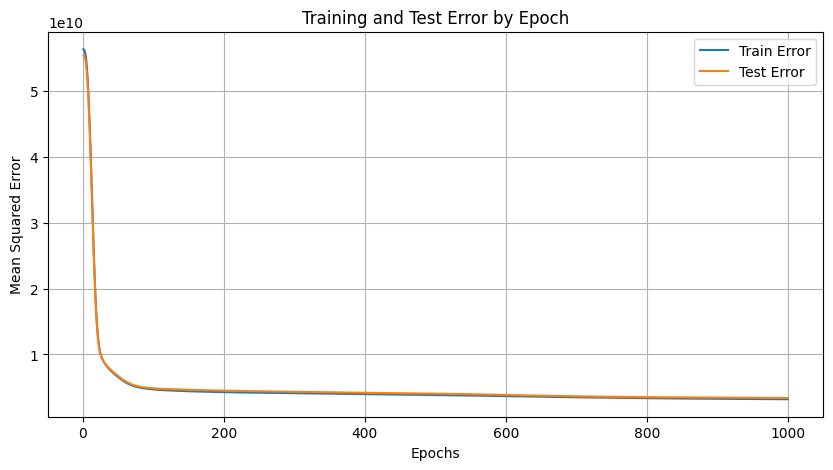

In [ ]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Define the MLPRegressor model
model_mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50),
                                   max_iter=1000,
                                   activation='relu',
                                   learning_rate='adaptive',
                                   solver='adam',
                                   alpha=0.0001)

# Gradiente adam ("Adaptive Moment Estimation"):
# ajusta iterativamente os pesos da rede neural usando momentos adaptativos dos gradientes.
# O segredo do ADAM reside em sua combinação inteligente de duas técnicas bem-sucedidas:
  # Momentum: Essa técnica acumula os gradientes anteriores, impulsionando o movimento em direções consistentes e suavizando o caminho de otimização.
  # RMSprop (Root Mean Square Prop): Esse método ajusta adaptativamente a taxa de aprendizado para cada parâmetro com base no histórico recente de seus gradientes.
# Isso permite uma convergência eficiente e robusta, especialmente útil em problemas com grande dimensionalidade ou em presença de ruído.

# Treinar o modelo
epochs = 1000
train_errors = []
test_errors = []

for epoch in range(epochs):
    model_mlp_regressor.partial_fit(X_train_scaled, y_train.ravel())

    # Calcular erro de treinamento
    train_pred = model_mlp_regressor.predict(X_train_scaled)
    train_error = mean_squared_error(y_train.ravel(), train_pred)
    train_errors.append(train_error)

    # Calcular erro de teste
    test_pred = model_mlp_regressor.predict(X_test_scaled)
    test_error = mean_squared_error(y_test.ravel(), test_pred)
    test_errors.append(test_error)

# Plotar resultados
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_errors, label='Train Error')
plt.plot(range(1, epochs + 1), test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error by Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Avaliar o modelo na base de teste
y_pred_model_mlp_regressor = model_mlp_regressor.predict(X_test_scaled)

r2_y_pred_model_mlp_regressor = r2_score(y_test, y_pred_model_mlp_regressor) # R²
mse_y_pred_model_mlp_regressor = mean_squared_error(y_test, y_pred_model_mlp_regressor) # Erro quadrático médio
mae_y_pred_model_mlp_regressor = mean_absolute_error(y_test, y_pred_model_mlp_regressor) # Erro absoluto médio
mapr_pred_model_mlp_regressor = mapr(y_test, y_pred_model_mlp_regressor)


# Imprimir os resultados
print("R²:", r2_y_pred_model_mlp_regressor)
print("Erro quadrático médio:", mse_y_pred_model_mlp_regressor)
print("Erro absoluto médio:", mae_y_pred_model_mlp_regressor)
print("Erro percentual absoluto médio:", mapr_pred_model_mlp_regressor)

# Testando modelos mais robustos

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train.ravel())

# Avaliar o modelo na base de teste
y_pred_model_rf_regressor = rf_regressor.predict(X_test_scaled)

r2_y_pred_model_rf_regressor = r2_score(y_test, y_pred_model_rf_regressor) # R²
mse_y_pred_model_rf_regressor = mean_squared_error(y_test, y_pred_model_rf_regressor) # Erro quadrático médio
mae_y_pred_model_rf_regressor = mean_absolute_error(y_test, y_pred_model_rf_regressor) # Erro absoluto médio
mapr_pred_model_rf_regressor = mapr(y_test, y_pred_model_rf_regressor)


# Imprimir os resultados
print("R²:", r2_y_pred_model_rf_regressor)
print("Erro quadrático médio:", mse_y_pred_model_rf_regressor)
print("Erro absoluto médio:", mae_y_pred_model_rf_regressor)
print("Erro percentual absoluto médio:", mapr_pred_model_rf_regressor)